## Validation Plots

Initial set of plots to investigate outputs and confirm expected behaviours

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

plt.rcParams["font.family"] = "Times New Roman"


In [28]:
#csv_file_path = r"outputs\LL-Output-Fri-18-Oct-2024-at-02-35-26PM.txt"

csv_file_path = r"outputs\LL-Output-Mon-28-Oct-2024-at-11-06-39AM.txt"

metadata = pd.read_csv(csv_file_path, header=None, nrows=6)

date = metadata.iloc[1, 0]  
size = metadata.iloc[2, 0]  
MCsteps = metadata.iloc[3, 0]  
T = metadata.iloc[4, 0]  
time = metadata.iloc[5, 0]  

print(date)
print(size)
print(MCsteps)
print(T)
print(time)

df = pd.read_csv(csv_file_path, skiprows=9,  sep='\s+')
df.columns = ['MC_Step', 'Ratio', 'Energy', 'Order']


# File created:        Mon-28-Oct-2024-at-11-06-39AM
# Size of lattice:     50x50
# Number of MC steps:  150
# Reduced temperature: 0.500
# Run time (s):        11.377197


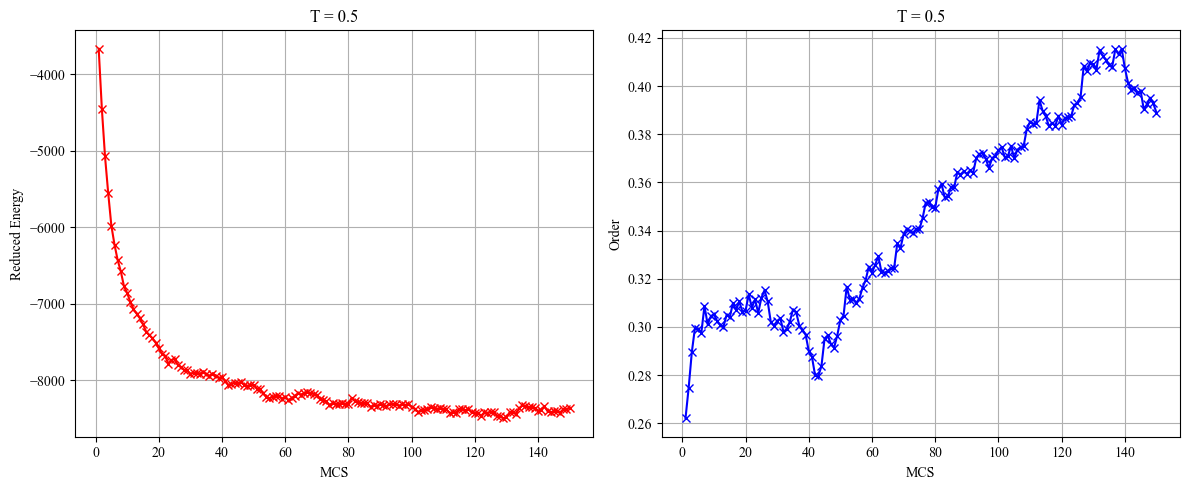

In [29]:
# Checking Convergence
plt.figure(figsize=(12, 5))

# Subplot for Energy vs MC_Step
plt.subplot(1, 2, 1) 
plt.plot(df['MC_Step'], df['Energy'], marker='x', color='r')
plt.title('T = 0.5')
plt.xlabel('MCS')
plt.ylabel('Reduced Energy')
plt.grid()

# Subplot for Order vs MC_Step
plt.subplot(1, 2, 2) 
plt.plot(df['MC_Step'], df['Order'], marker='x', color='b')
plt.title('T = 0.5')
plt.xlabel('MCS')
plt.ylabel('Order')
plt.grid()


plt.tight_layout()
plt.show()


## Time Evaluation

In [30]:
def extract_size_time(file_name):
    data = []

    #read file
    with open(f"outputs/{file_name}", 'r', encoding='utf-16') as file:
        lines = file.readlines()

    #regex pattern to match Size and Time
    pattern = r"Size:\s*(\d+).*?Time:\s*([\d.]+)\s*s"

    for line in lines:
        match = re.search(pattern, line)
        if match:
            size = int(match.group(1))  
            time = float(match.group(2))  
            
            data.append({'Size': size, 'Time': time})

    return data

In [31]:
data = extract_size_time("basic.txt")
df = pd.DataFrame(data)

cythonraw = extract_size_time("cython-raw.txt")
cythonrawdf = pd.DataFrame(cythonraw)

#cythonbasic = pd.DataFrame(extract_size_time("cython-basic.txt"))
cythonfull = pd.DataFrame(extract_size_time("cython-full.txt"))

npvector = pd.DataFrame(extract_size_time("npvector.txt"))

numbaj = pd.DataFrame(extract_size_time("numbajit.txt"))
numbapMC = pd.DataFrame(extract_size_time("numba-parallelMC.txt"))

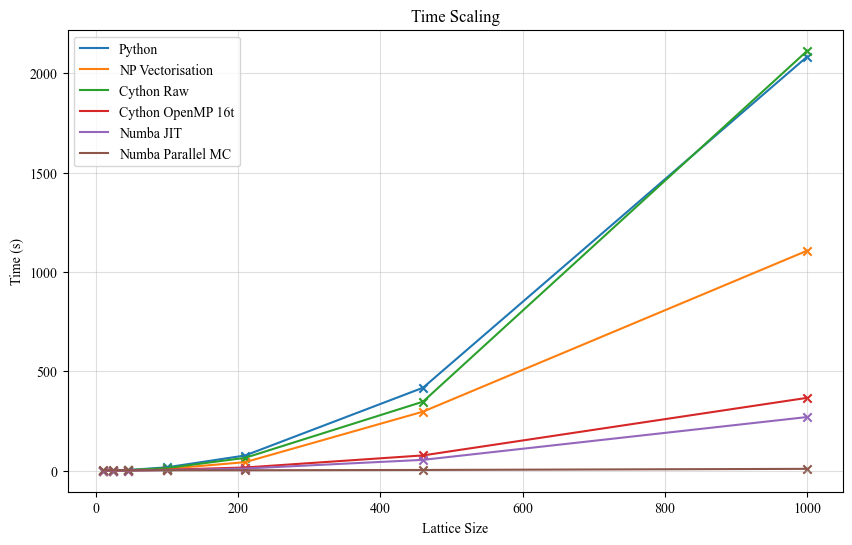

In [32]:

plt.figure(figsize=(10, 6))

#Basic Data
plt.scatter(df['Size'], df['Time'], marker='x')
plt.plot(df['Size'], df['Time'], label='Python')

#Numpy Vectorisationc
plt.scatter(npvector['Size'], npvector['Time'], marker='x')
plt.plot(npvector['Size'], npvector['Time'], label='NP Vectorisation')

#Raw Cythonised Data
plt.scatter(cythonrawdf['Size'], cythonrawdf['Time'], marker='x')
plt.plot(cythonrawdf['Size'], cythonrawdf['Time'], label='Cython Raw')

#Basic Cython 
# plt.scatter(cythonbasic['Size'], cythonbasic['Time'], marker='x')
# plt.plot(cythonbasic['Size'],  cythonbasic['Time'], label='Cython Basic')

#OpenMP Cython
plt.scatter( cythonfull['Size'], cythonfull['Time'], marker='x')
plt.plot(cythonfull['Size'], cythonfull['Time'], label='Cython OpenMP 16t')

#Numba JIT
plt.scatter(numbaj['Size'], numbaj['Time'], marker='x')
plt.plot(numbaj['Size'], numbaj['Time'], label='Numba JIT')

#Numba Parallel MC
plt.scatter(numbapMC['Size'], numbapMC['Time'], marker='x')
plt.plot(numbapMC['Size'], numbapMC['Time'], label='Numba Parallel MC')


#Formatting  
#plt.yscale('log')
#plt.xscale('log')
plt.title('Time Scaling')
plt.xlabel('Lattice Size')
plt.ylabel('Time (s)')
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()

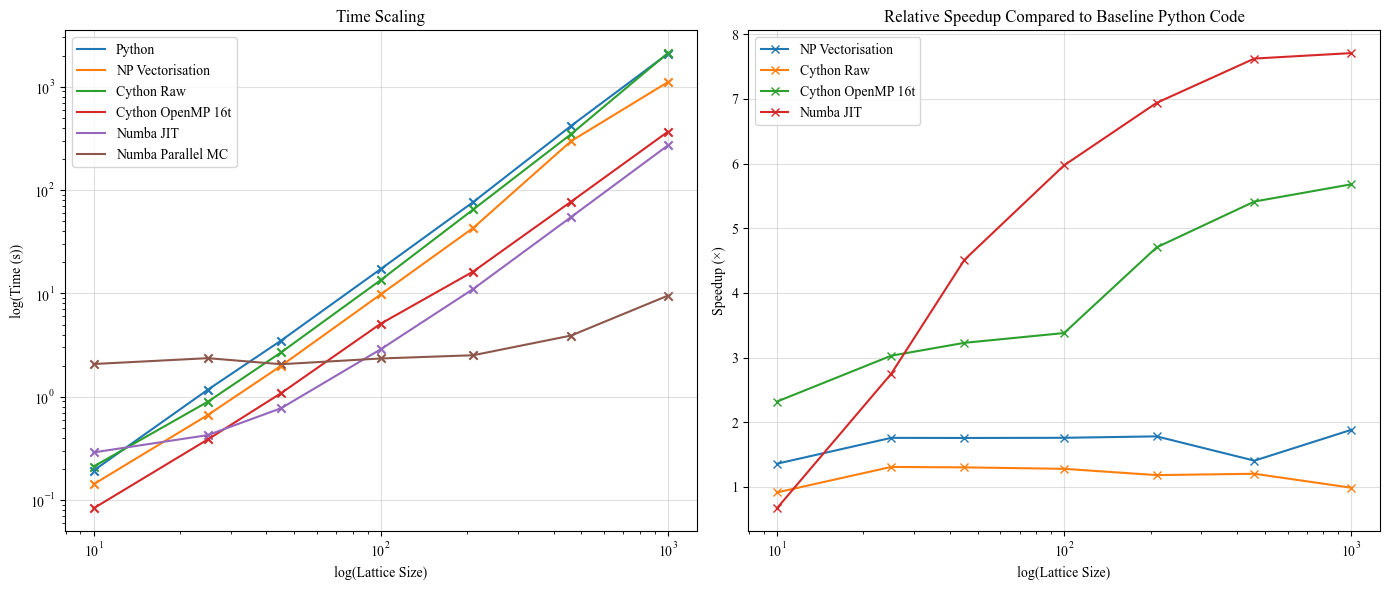

In [33]:
# Calculate speedup for each optimized method
speedup_data = {
    'Size': df['Size'],
    'NP Vectorisation': df['Time'] / npvector['Time'],
    'Cython Raw': df['Time'] / cythonrawdf['Time'],
    'Cython OpenMP': df['Time'] / cythonfull['Time'],
    'Numba JIT': df['Time'] / numbaj['Time'],
    'Numba Parallel MC': df['Time'] / numbapMC['Time']
}
speedup_df = pd.DataFrame(speedup_data)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# First subplot for time scaling
ax1.scatter(df['Size'], df['Time'], marker='x')
ax1.plot(df['Size'], df['Time'], label='Python')

ax1.scatter(npvector['Size'], npvector['Time'], marker='x')
ax1.plot(npvector['Size'], npvector['Time'], label='NP Vectorisation')

ax1.scatter(cythonrawdf['Size'], cythonrawdf['Time'], marker='x')
ax1.plot(cythonrawdf['Size'], cythonrawdf['Time'], label='Cython Raw')

ax1.scatter(cythonfull['Size'], cythonfull['Time'], marker='x')
ax1.plot(cythonfull['Size'], cythonfull['Time'], label='Cython OpenMP 16t')

ax1.scatter(numbaj['Size'], numbaj['Time'], marker='x')
ax1.plot(numbaj['Size'], numbaj['Time'], label='Numba JIT')

ax1.scatter(numbapMC['Size'], numbapMC['Time'], marker='x')
ax1.plot(numbapMC['Size'], numbapMC['Time'], label='Numba Parallel MC')

ax1.scatter(cython_mpi8['Size'], cython_mpi8['Time'], marker='x')
ax1.plot(cython_mpi8['Size'], cython_mpi8['Time'], label='Cython MPI 8proc')

# Formatting for first subplot
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title('Time Scaling')
ax1.set_xlabel('log(Lattice Size)')
ax1.set_ylabel('log(Time (s))')
ax1.grid(True, alpha=0.4)
ax1.legend()

# Second subplot for speedup
ax2.plot(speedup_df['Size'], speedup_df['NP Vectorisation'], label='NP Vectorisation', marker='x')
ax2.plot(speedup_df['Size'], speedup_df['Cython Raw'], label='Cython Raw', marker='x')
ax2.plot(speedup_df['Size'], speedup_df['Cython OpenMP'], label='Cython OpenMP', marker='x')
ax2.plot(speedup_df['Size'], speedup_df['Numba JIT'], label='Numba JIT', marker='x')
#ax2.plot(speedup_df['Size'], speedup_df['Numba Parallel MC'], label='Numba Parallel MC', marker='x')

# Formatting for second subplot
ax2.set_title('Relative Speedup Compared to Baseline Python Code')
ax2.set_xlabel('log(Lattice Size)')
ax2.set_ylabel('Speedup (×)')
ax2.set_xscale('log')
ax2.grid(True, alpha=0.4)
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()


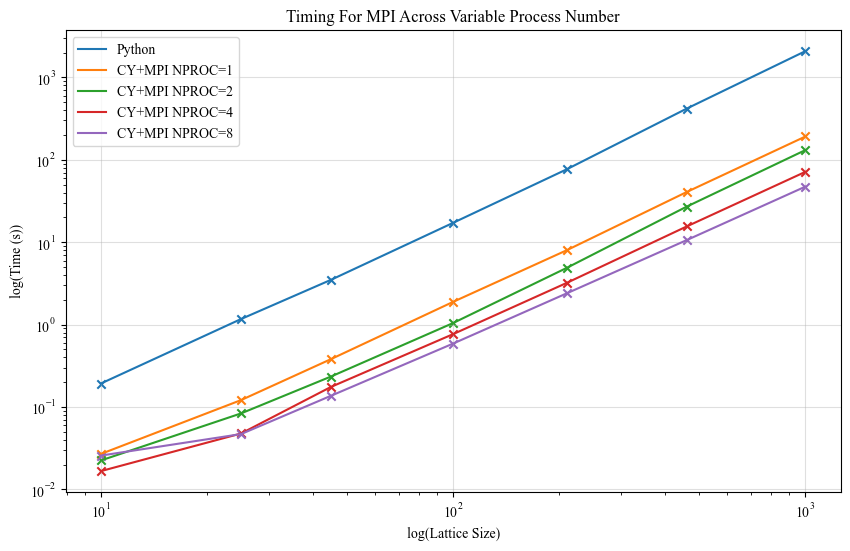

In [39]:
# Cython + MPI

cython_mpi1 = pd.DataFrame(extract_size_time("cython-mpi_1.txt"))
cython_mpi2 = pd.DataFrame(extract_size_time("cython-mpi_2.txt"))
cython_mpi4 = pd.DataFrame(extract_size_time("cython-mpi_4.txt"))
cython_mpi8 = pd.DataFrame(extract_size_time("cython-mpi_8.txt"))

plt.figure(figsize=(10, 6))

#Basic Data
plt.scatter(df['Size'], df['Time'], marker='x')
plt.plot(df['Size'], df['Time'], label='Python')

#1 Process
plt.scatter(cython_mpi1['Size'], cython_mpi1['Time'], marker='x')
plt.plot(cython_mpi1['Size'], cython_mpi1['Time'], label='CY+MPI NPROC=1')
#2 Processes
plt.scatter(cython_mpi2['Size'], cython_mpi2['Time'], marker='x')
plt.plot(cython_mpi2['Size'], cython_mpi2['Time'], label='CY+MPI NPROC=2')
#4 Processes
plt.scatter(cython_mpi4['Size'], cython_mpi4['Time'], marker='x')
plt.plot(cython_mpi4['Size'], cython_mpi4['Time'], label='CY+MPI NPROC=4')
#8 Processes
plt.scatter(cython_mpi8['Size'], cython_mpi8['Time'], marker='x')
plt.plot(cython_mpi8['Size'], cython_mpi8['Time'], label='CY+MPI NPROC=8')


#Formatting  
plt.yscale('log')
plt.xscale('log')
plt.title('Timing For MPI Across Variable Process Number')
plt.xlabel('log(Lattice Size)')
plt.ylabel('log(Time (s))')
plt.grid(True, alpha=0.4)
plt.legend()
plt.show()